In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/data/"
SEED = 42

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(f"{DATA_PATH}imdb.csv")
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
df["sentiment"].mean()

0.516042780748663

# 자연어처리(Natural Language Processing)
- 자연어 이해
- 자연어 생성

# 단어문서행렬(Term Document Matrix)
- 문서별로 단어의 빈도를 정리한 표

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer(max_features=100,stop_words="english")

tdm = cnt_vec.fit_transform(df["review"])
tdm

<748x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1775 stored elements in Compressed Sparse Row format>

In [ ]:
tdm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cnt_vec.get_feature_names_out()

array(['10', 'acting', 'actor', 'actors', 'actually', 'art', 'awful',
       'bad', 'beautiful', 'best', 'better', 'big', 'black', 'boring',
       'camera', 'cast', 'character', 'characters', 'cinematography',
       'definitely', 'dialogue', 'did', 'didn', 'director', 'doesn',
       'don', 'drama', 'effects', 'end', 'ending', 'excellent', 'feeling',
       'film', 'films', 'funny', 'game', 'going', 'good', 'great',
       'highly', 'interesting', 'job', 'just', 'know', 'life', 'like',
       'liked', 'line', 'little', 'look', 'love', 'loved', 'make', 'man',
       'movie', 'movies', 'music', 'people', 'performance', 'piece',
       'played', 'plot', 'predictable', 'pretty', 'quite', 'real',
       'really', 'recommend', 'right', 'saw', 'say', 'scene', 'scenes',
       'screen', 'script', 'seen', 'short', 'simply', 'story', 'stupid',
       'terrible', 'thing', 'things', 'think', 'thought', 'time',
       'totally', 'truly', 've', 'waste', 'watch', 'watching', 'way',
       'wonderfu

In [ ]:
tdm_df = pd.DataFrame(tdm.toarray(),columns=cnt_vec.get_feature_names_out())
tdm_df

,10,acting,actor,actors,actually,art,awful,bad,beautiful,best,...,watch,watching,way,wonderful,work,worse,worst,worth,writing,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tdm_df.sum().to_dict()

{'10': 29,
 'acting': 43,
 'actor': 10,
 'actors': 19,
 'actually': 10,
 'art': 13,
 'awful': 14,
 'bad': 71,
 'beautiful': 11,
 'best': 25,
 'better': 18,
 'big': 10,
 'black': 10,
 'boring': 10,
 'camera': 10,
 'cast': 18,
 'character': 24,
 'characters': 35,
 'cinematography': 10,
 'definitely': 9,
 'dialogue': 13,
 'did': 11,
 'didn': 22,
 'director': 12,
 'doesn': 12,
 'don': 26,
 'drama': 10,
 'effects': 9,
 'end': 11,
 'ending': 11,
 'excellent': 16,
 'feeling': 10,
 'film': 163,
 'films': 24,
 'funny': 19,
 'game': 9,
 'going': 10,
 'good': 58,
 'great': 41,
 'highly': 10,
 'interesting': 12,
 'job': 9,
 'just': 63,
 'know': 14,
 'life': 12,
 'like': 48,
 'liked': 10,
 'line': 12,
 'little': 17,
 'look': 19,
 'love': 22,
 'loved': 10,
 'make': 22,
 'man': 13,
 'movie': 182,
 'movies': 29,
 'music': 14,
 'people': 14,
 'performance': 12,
 'piece': 10,
 'played': 10,
 'plot': 28,
 'predictable': 10,
 'pretty': 13,
 'quite': 10,
 'real': 21,
 'really': 41,
 'recommend': 13,
 'righ

# 단어구름 만들어 시각화해보기

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white",width=500,height=500)

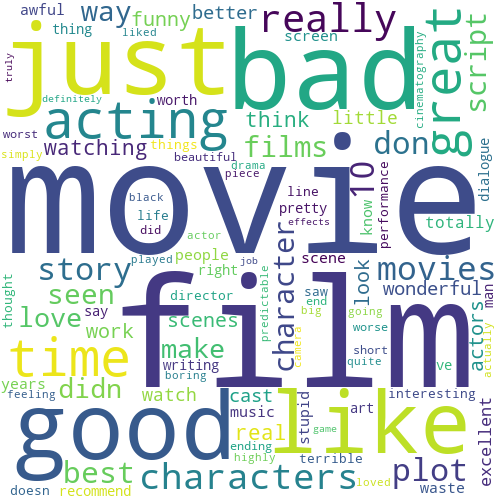

In [ ]:
cloud = wc.generate_from_frequencies(tdm_df.sum().to_dict())
cloud.to_image()

# TF-IDF
- 단어 빈도(TF) 와 역문서빈도(IDF) 를 곱한값
- 단어 빈도에 가중치를 주는 방법
- 문서빈도(DF) : 각 단어가 등장한 문서의수
- 역문서빈도(IDF) : 총문서를 DF로 나눈값

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=100, stop_words="english")
tfidf = tfidf_vec.fit_transform(df["review"])
tfidf

<748x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1775 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(tfidf.toarray(),columns = tfidf_vec.get_feature_names_out())

,10,acting,actor,actors,actually,art,awful,bad,beautiful,best,...,watch,watching,way,wonderful,work,worse,worst,worth,writing,years
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.402595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.618573,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.785154,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
744,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.652005,0.0,0.0,0.0,0.0,0.0
745,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
746,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# 토큰화(tokenization)
- 자연어 처리를 위해 문장을 처리하기 위한 단위인 토큰으로 분리하는것

In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer("basic_english")
# get_tokenizer(lambda x : x.split())

In [ ]:
tokenizer("i love you")

['i', 'love', 'you']

- 어휘집 만들기

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
def yield_tokens(data,tokenizer):
    for text in data:
        yield tokenizer(text)

- padding
- OOV(Out-Of-Vocabulary) 

In [ ]:
gen =yield_tokens(df["review"],tokenizer)
vocab = build_vocab_from_iterator(gen,specials=["<pad>","<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [ ]:
len(vocab)

3146

In [ ]:
vocab(["a","very","karns"])

[6, 34, 1]

In [ ]:
vocab.lookup_tokens([6,34,1,0])

['a', 'very', '<unk>', '<pad>']

- 학습 및 정답 데이터 만들기

In [ ]:
train = [ vocab(tokenizer(text))  for text in df["review"].tolist()]
target = df.sentiment.to_numpy()
len(train), target.shape

(748, (748,))

In [ ]:
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import random # 시드 고정을 위해
import os # 시드 고정을 위해

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
    np.random.seed(seed)
    torch.manual_seed(seed) # cpu 연산 무작위 고정
    torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
    torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

In [ ]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self,x,y=None):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        item = {}
        item["x"] = self.x[idx]
        if self.y is not None:
            item["y"] = self.y[idx]
        return item

In [ ]:
dt = ReviewDataset(train,target)
[dt[0] , dt[1]]

[{'x': [6,
   34,
   4,
   34,
   4,
   34,
   2741,
   4,
   1263,
   16,
   44,
   6,
   1688,
   4,
   1709,
   524,
   155,
   2],
  'y': 0},
 {'x': [32,
   696,
   62,
   15,
   71,
   462,
   70,
   3,
   896,
   66,
   58,
   3,
   345,
   4,
   2338,
   312,
   7,
   1187,
   1174,
   52,
   2],
  'y': 0}]

- collate_fn

In [ ]:
def collate_fn(samples):
    x = [ torch.LongTensor(sample["x"]) for sample in samples]
    y = [ sample["y"] for sample in samples]
    y = torch.Tensor(y).view(-1,1)
    x = torch.nn.utils.rnn.pad_sequence(x,batch_first=True)
    return {"x":x,"y":y}

In [ ]:
dl = torch.utils.data.DataLoader(dt,shuffle=False ,batch_size = 8,collate_fn = collate_fn)

In [ ]:
batch = next(iter(dl))
batch

{'x': tensor([[   6,   34,    4,   34,    4,   34, 2741,    4, 1263,   16,   44,    6,
          1688,    4, 1709,  524,  155,    2,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [  32,  696,   62,   15,   71,  462,   70,    3,  896,   66,   58,    3,
           345,    4, 2338,  312,    7, 1187, 1174,   52,    2,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [1319, 1306,   26,  198,  216,  264,    5,  352,  244,  753,    4,    3,
            16,  304,   70,  769,   59,   71,  387,   70,   24,    3,   54,   15,
           329,    5,    3,   80,    5,  280,  218, 2357,    2],
         [  34,  125,  144,   58,  241,   13,  690,    7,    2,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   3,   85,  147,   14,    3,   16,   15,   77, 1934,    8,  513,   1

# 단어 임베딩(embedding)
- 단어를 실수 형태의 벡터로 표현하는것
- 신경망에서 임베딩 레이어를 추가하여 단어에 임베딩을 얻을수 있음.

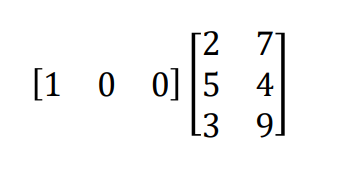

- num_embeddings
    - 임베딩을 할 단어들의 개수
- embedding_dim
    - 단어마다 임베딩할 벡터의 차원

In [ ]:
len(vocab)

3146

In [ ]:
emb_layer = torch.nn.Embedding(len(vocab),4)
x = emb_layer(batch["x"])
x.shape

torch.Size([8, 33, 4])

In [ ]:
x

tensor([[[ 0.3667, -1.6846,  0.9504,  1.2340],
         [-1.5445,  0.7828, -1.2682,  0.0943],
         [ 1.4855,  0.3798, -0.5906, -0.4214],
         ...,
         [-0.3035,  0.3231, -0.4153,  1.0929],
         [-0.3035,  0.3231, -0.4153,  1.0929],
         [-0.3035,  0.3231, -0.4153,  1.0929]],

        [[ 0.0353,  0.3614,  1.4359, -0.5915],
         [ 0.4182, -0.2155,  1.0915,  0.3028],
         [ 0.5137,  1.0287,  0.8395,  1.9115],
         ...,
         [-0.3035,  0.3231, -0.4153,  1.0929],
         [-0.3035,  0.3231, -0.4153,  1.0929],
         [-0.3035,  0.3231, -0.4153,  1.0929]],

        [[-0.9702,  0.6797,  1.2892,  1.0209],
         [-0.2892,  0.4299,  0.5566, -1.5891],
         [-0.8799,  0.7133, -0.0741, -0.9959],
         ...,
         [ 0.5581, -0.1829,  0.5850, -0.0424],
         [-0.2814, -0.8977, -1.1722, -1.0319],
         [-0.4804, -0.5172,  0.0758,  0.4550]],

        ...,

        [[-0.5479, -0.2498,  1.2068, -0.3125],
         [ 0.3217, -0.8962, -0.7013, -0.4357]

In [ ]:
emb_layer.weight.shape

torch.Size([3146, 4])

In [ ]:
# 임베딩 레이어를 통과시킨다.
# rnn 레이어를 통과시킨다. 

In [ ]:
type(train)

list

In [ ]:
tri = [2,3,4]
np.array(train,dtype="object")[tri]

array([list([1319, 1306, 26, 198, 216, 264, 5, 352, 244, 753, 4, 3, 16, 304, 70, 769, 59, 71, 387, 70, 24, 3, 54, 15, 329, 5, 3, 80, 5, 280, 218, 2357, 2]),
       list([34, 125, 144, 58, 241, 13, 690, 7, 2]),
       list([3, 85, 147, 14, 3, 16, 15, 77, 1934, 8, 513, 13, 202, 6, 497, 17, 963, 1085, 214, 51, 927, 2])],
      dtype=object)

# 모델 만들기

In [ ]:
class RNNModel(torch.nn.Module):
    def __init__(self,vocab_size,embedding_dim):
        super().__init__()
        self.emb_layer = torch.nn.Embedding(vocab_size,embedding_dim)
        self.gru_layer = torch.nn.GRU(embedding_dim,embedding_dim//2,batch_first=True)
        self.output_layer = torch.nn.Linear(embedding_dim//2,1)
    def forward(self,x):
        x = self.emb_layer(x)
        _ , x = self.gru_layer(x)
        x = x.squeeze()
        x = self.output_layer(x)
        return x

In [ ]:
model = RNNModel(len(vocab),32)
model(batch["x"])

tensor([[-0.5154],
        [-0.5120],
        [ 0.1031],
        [-0.5175],
        [-0.5091],
        [-0.2556],
        [-0.5176],
        [-0.5160]], grad_fn=<AddmmBackward0>)

In [ ]:
def train_loop(dataloader,model,loss_fn,optimizer,device):
    epoch_loss = 0
    model.train()
    for batch in dataloader: 
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred, batch["y"].to(device)) 
        
        optimizer.zero_grad() 
        loss.backward()  
        optimizer.step() 
        
        epoch_loss += loss.item()

    epoch_loss /= len(dataloader) 

    return epoch_loss 

In [ ]:
@torch.no_grad() 
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    model.eval() 

    pred_list = []
    sig = torch.nn.Sigmoid()

    for batch in dataloader:
        
        pred = model(batch["x"].to(device))
        if batch.get("y") is not None: 
            loss = loss_fn(pred, batch["y"].to(device))
            epoch_loss += loss.item()
        pred = sig(pred)
        pred = pred.to("cpu").numpy() 
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list) 
    return epoch_loss , pred 

In [ ]:
n_splits = 5
vocab_size = len(vocab)
embedding_dim = 32
batch_size = 32
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=n_splits,shuffle=True, random_state=SEED)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_arr = np.array(train,dtype="object")

In [ ]:
is_holdout = True
reset_seeds(SEED)
for tri, vai in cv.split(train_arr):
    
    model = RNNModel(vocab_size, embedding_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters())
    
    train_dt = ReviewDataset(train_arr[tri],target[tri])
    valid_dt = ReviewDataset(train_arr[vai],target[vai])
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True,collate_fn=collate_fn)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size,shuffle=False,collate_fn=collate_fn)

    for epoch in range(epochs):
        
        train_loss = train_loop(train_dl, model, loss_fn,optimizer,device )
        valid_loss , pred = test_loop(valid_dl, model, loss_fn,device  )
        pred = (pred > 0.5).astype(int) # 정확도 계산이니까 0 과 1 둘중에 결정해주기
        print(train_loss,valid_loss , accuracy_score(target[vai],pred ) )

    if is_holdout:
        break

0.7025122485662761 0.6922433853149415 0.5066666666666667
0.6938319739542509 0.6928412556648255 0.5066666666666667
0.6944692730903625 0.6941798567771912 0.5066666666666667
0.6920806891039798 0.6926254153251648 0.5066666666666667
0.6902924713335539 0.6931883215904235 0.5066666666666667
0.6918500379512185 0.6943435549736023 0.5066666666666667
0.6904145008639285 0.6925901889801025 0.5066666666666667
0.6906857490539551 0.692917275428772 0.5066666666666667
0.6901578526747855 0.6923453092575074 0.5066666666666667
0.6884842703216955 0.6930947303771973 0.5066666666666667
0.6857644225421705 0.6929880857467652 0.5066666666666667
0.6845899036056117 0.6937544703483581 0.5066666666666667
0.6823492081541764 0.6908374905586243 0.5066666666666667
0.679256021976471 0.6914453268051147 0.5066666666666667
0.6831331754985609 0.6869304180145264 0.5066666666666667
0.6699526404079638 0.6869678258895874 0.5066666666666667
0.6703193815130937 0.6863693952560425 0.5066666666666667
0.6527056599918165 0.679305458068